# Implementing the Second Method of the R(5, 5) Paper

Here is an outline of an implementation for the algorithm outlined in page 8 of the R(5, 5) paper. I've broken it up into individual pieces which may be attacked by different researchers. 

## First, methods for enumerating (r, s, t)-cliques and (r, s, t)-independent sets. 

Recall for (r, s, t)-cliques, we have (r, s, t) is either (1, 2, 2), (0, 2, 3) or (0, 3, 2).

In [1]:
import itertools
# Description: Defintion on page 6
# Input: G, a (first pointed graph we are gluing) and H, b (second pointed graph we are glueing)
# K is the shared neighborhood of a and b in both graphs (K is in R(3,5,d)). Note that for this method, we assume
# K's vertices when found in G and H will have the same labels in all 3 graphs.
# Output: A list of all the (r, s, t) cliques. 


def get_rst_cliques(G, a, H, b, K):
    #Contains 3-tuples of the form (w_tuple, x_tuple, y_tuple)
    rst_cliques = []
    VK = K.vertices()
    xs = (set(G.vertices()) - set(VK))
    xs.remove(a)
    ys = (set(H.vertices()) - set(VK))
    ys.remove(b)

    def clique_helper(r, s, t, VK_, xs_, ys_):
        output = []
        if r > 0:
            for w_comb in itertools.combinations(VK_,r):
                #contains s-tuples that form r+s - independent sets with w in G
                x_cliques = []
                #contains t-tuples that form r+t - independent sets with w in H
                y_cliques = []

                for x_comb in itertools.combinations(xs_, s):
                    comb = w_comb + x_comb
                    if G.is_clique(comb):
                        x_cliques.append(x_comb)

                for y_comb in itertools.combinations(ys_, t):
                    comb = w_comb + y_comb
                    if H.is_clique(comb):
                        y_cliques.append(y_comb)

                for x_comb in x_cliques:
                    for y_comb in y_cliques:
                        output.append( ( w_comb, x_comb, y_comb ) )
            return output
        else:
            #contains s-tuples that form s - independent sets in G
            x_cliques = []
            #contains t-tuples that form t - independent sets in H
            y_cliques = []
            for x_comb in itertools.combinations(xs_, s):
                if G.is_clique(x_comb):
                    x_cliques.append(x_comb)

            for y_comb in itertools.combinations(ys_, t):
                if H.is_clique(y_comb):
                    y_cliques.append(y_comb)

            for x_comb in x_cliques:
                for y_comb in y_cliques:
                    output.append( ( (), x_comb, y_comb ) )
            
            return output


    rst_cliques += clique_helper(1,2,2,VK,xs,ys)
    rst_cliques += clique_helper(0,2,3,VK,xs,ys)
    rst_cliques += clique_helper(0,3,2,VK,xs,ys)

    return rst_cliques

Here is an example usage of the above function

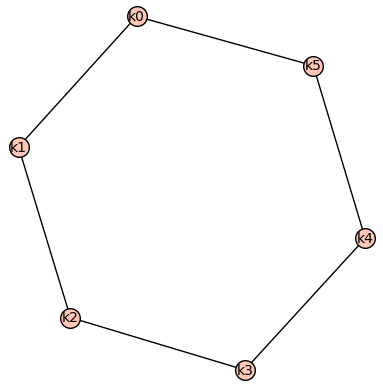

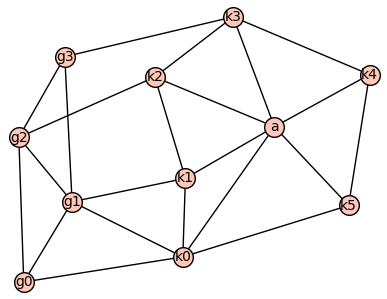

3
4


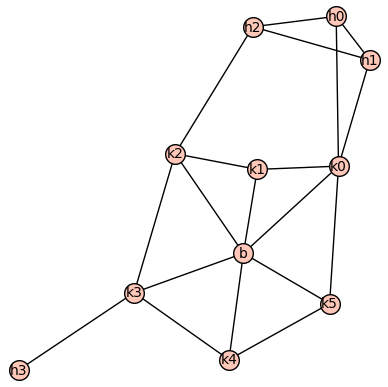

3
4


[(('k0',), ('g1', 'g0'), ('h0', 'h1')),
 ((), ('g2', 'g1'), ('h0', 'h2', 'h1')),
 ((), ('g2', 'g3'), ('h0', 'h2', 'h1')),
 ((), ('g2', 'g0'), ('h0', 'h2', 'h1')),
 ((), ('g1', 'g3'), ('h0', 'h2', 'h1')),
 ((), ('g1', 'g0'), ('h0', 'h2', 'h1')),
 ((), ('g2', 'g1', 'g3'), ('h0', 'h2')),
 ((), ('g2', 'g1', 'g3'), ('h0', 'h1')),
 ((), ('g2', 'g1', 'g3'), ('h2', 'h1')),
 ((), ('g2', 'g1', 'g0'), ('h0', 'h2')),
 ((), ('g2', 'g1', 'g0'), ('h0', 'h1')),
 ((), ('g2', 'g1', 'g0'), ('h2', 'h1'))]

In [2]:
#Sample Execution
K = graphs.EmptyGraph()
for i in range(6):
    vertex_label = "k" + str(i)
    K.add_vertex(vertex_label)
for i in range(6):
    K.add_edge("k"+str(i), "k"+str((i+1)%6))
K.show()

G = K.copy()
G.add_vertex("a")
G.add_vertices(["g0", "g1", "g2", "g3"])
G.add_edges([("a", x) for x in K.vertices()])
for i in range(3):
    G.add_edge("g"+str(i), "g"+str((i+1)))
for i in range(4):
    G.add_edge("g"+str(i), "k"+str((i)))
G.add_edges([("k0","g1"), ("g0","g2"), ("g1","g3")])
G.show()
print(G.clique_number())
print(G.complement().clique_number())

H = K.copy()
H.add_vertex("b")
H.add_vertices(["h0", "h1", "h2", "h3"])
H.add_edges([("b", x) for x in K.vertices()])
H.add_edges([("k0", "h0"), ("k0", "h1"), ("h0", "h1"), ("h0", "h2"), ("h1", "h2"), ("k3", "h3"), ("k2", "h2")])
H.show()
print(H.clique_number())
print(H.complement().clique_number())

get_rst_cliques(G, "a", H, "b", K)

Recall for (r, s, t)-independent sets, we have (r, s, t) is either r (3, 1, 1), (2, 1, 2), (2, 2, 1), (1, 1, 3), (1, 2, 2), (1, 3, 1), (0, 2, 3) or (0, 3, 2).

In [3]:
# Description: Defintion on page 6
# Input: G, a (first pointed graph we are gluing) and H, b (second pointed graph we are glueing)
# K is the shared neighborhood of a and b in both graphs (K is in R(3,5,d)). Note that for this method, we assume
# K's vertices when found in G and H will have the same labels in all 3 graphs.
# Output: A list of all the (r, s, t) independent sets. 
def get_rst_independent_sets(G, a, H, b, K):
    #Contains 3-tuples of the form (w_tuple, x_tuple, y_tuple)
    rst_IS = []
    VK = K.vertices()
    xs = (set(G.vertices()) - set(VK))
    xs.remove(a)
    ys = (set(H.vertices()) - set(VK))
    ys.remove(b)

    def indepHelper(r,s,t, VK_, xs_, ys_):
        output = []
        if r > 0:
            for w_comb in itertools.combinations(VK_,r):
                #contains s-tuples that form r+s - independent sets with w in G
                x_cliques = []
                #contains t-tuples that form r+t - independent sets with w in H
                y_cliques = []

                for x_comb in itertools.combinations(xs_, s):
                    comb = w_comb + x_comb
                    if G.is_independent_set(comb):
                        x_cliques.append(x_comb)

                for y_comb in itertools.combinations(ys_, t):
                    comb = w_comb + y_comb
                    if H.is_independent_set(comb):
                        y_cliques.append(y_comb)

                for x_comb in x_cliques:
                    for y_comb in y_cliques:
                        output.append( ( w_comb, x_comb, y_comb ) )
            return output
        else:
            #contains s-tuples that form s - independent sets in G
            x_cliques = []
            #contains t-tuples that form t - independent sets in H
            y_cliques = []
            for x_comb in itertools.combinations(xs_, s):
                if G.is_independent_set(x_comb):
                    x_cliques.append(x_comb)

            for y_comb in itertools.combinations(ys_, t):
                if H.is_independent_set(y_comb):
                    y_cliques.append(y_comb)

            for x_comb in x_cliques:
                for y_comb in y_cliques:
                    output.append( ( (), x_comb, y_comb ) )
            
            return output

    rst_IS += indepHelper(3, 1, 1, VK, xs, ys)
    rst_IS += indepHelper(2, 1, 2, VK, xs, ys)
    rst_IS += indepHelper(2, 2, 1, VK, xs, ys)
    rst_IS += indepHelper(1, 1, 3, VK, xs, ys)
    rst_IS += indepHelper(1, 2, 2, VK, xs, ys)
    rst_IS += indepHelper(1, 3, 1, VK, xs, ys)
    rst_IS += indepHelper(0, 2, 3, VK, xs, ys)
    rst_IS += indepHelper(0, 3, 2, VK, xs, ys)
    
    return rst_IS

Example usage

In [4]:
output = get_rst_independent_sets(G, "a", H, "b", K)
print(len(output))
for i in output:
    print(i)

64
(('k0', 'k2', 'k4'), ('g3',), ('h3',))
(('k1', 'k3', 'k5'), ('g2',), ('h0',))
(('k1', 'k3', 'k5'), ('g2',), ('h2',))
(('k1', 'k3', 'k5'), ('g2',), ('h1',))
(('k1', 'k3', 'k5'), ('g0',), ('h0',))
(('k1', 'k3', 'k5'), ('g0',), ('h2',))
(('k1', 'k3', 'k5'), ('g0',), ('h1',))
(('k0', 'k4'), ('g2',), ('h2', 'h3'))
(('k0', 'k4'), ('g3',), ('h2', 'h3'))
(('k1', 'k4'), ('g2',), ('h0', 'h3'))
(('k1', 'k4'), ('g2',), ('h2', 'h3'))
(('k1', 'k4'), ('g2',), ('h3', 'h1'))
(('k1', 'k4'), ('g3',), ('h0', 'h3'))
(('k1', 'k4'), ('g3',), ('h2', 'h3'))
(('k1', 'k4'), ('g3',), ('h3', 'h1'))
(('k1', 'k4'), ('g0',), ('h0', 'h3'))
(('k1', 'k4'), ('g0',), ('h2', 'h3'))
(('k1', 'k4'), ('g0',), ('h3', 'h1'))
(('k1', 'k5'), ('g2',), ('h0', 'h3'))
(('k1', 'k5'), ('g2',), ('h2', 'h3'))
(('k1', 'k5'), ('g2',), ('h3', 'h1'))
(('k1', 'k5'), ('g3',), ('h0', 'h3'))
(('k1', 'k5'), ('g3',), ('h2', 'h3'))
(('k1', 'k5'), ('g3',), ('h3', 'h1'))
(('k1', 'k5'), ('g0',), ('h0', 'h3'))
(('k1', 'k5'), ('g0',), ('h2', 'h3'))
((

# Second, a method that turns constraints on M into a SAT instance.  

A very popular question in computer science is the *SATisfiability problem* which asks: how do you determine if a boolean formula (on n boolean variables) has an assignment of the variables that makes the formula true. Our formulas tend to be of the following form 

(x_1 OR x_2 OR ... x_k) AND (y_1 OR y_2 OR ... y_k) AND ... AND (z_1 OR z_2 OR ... OR z_k)

It turns out SAT is an NP hard problem! But SAT solving is such a common instance in computer science, there's a whole host of results and algorithms on it. 

We have a bunch of 0, 1 variables in a matrix M which needs to satisfy certain constraints (dictated by the rst cliques and indpendent sets). This is an excerpt from the paper: 

` Each entry m_ij of M is a variable, with value FALSE, TRUE or UNKNOWN, while each set {x1, . . . , xs} × {y1, . . . , yt} is a clause. Clauses from potential (r, s, t)-cliques can’t have all their variables TRUE, while clauses from potential independent (r, s, t)-sets can’t have all their variables FALSE.`
 
In other words, each rst clique / independent set exactly corresponds to a clause in our SAT formula! So, finding all the possible matrices M amounts to finding all the satisfying assignments of a certain formula. 

In [5]:
# Description: Takes two pointed graphs and creates a SAT formula encoding the constraints a glueing defined by M must satisfy. 
# Input: Two pointed graphs (variables names according to notation in paper)
# Output: A list of clauses, along with maps from vertices of G and H to indices for the matrix M
import GluingClasses as gc

def create_SAT_formula(G, a, H, b, K):
    
    # Find the rst-cliques and independent graphs
    rst_cliques = get_rst_cliques(G, a, H, b, K)
    rst_IS = get_rst_independent_sets(G, a, H, b, K)
    
    VK = K.vertices()
    xs = (set(G.vertices()) - set(VK))
    xs.remove(a)
    g_map = {}
    i = 0
    for x in xs:
        g_map[x] = i
        i += 1

    ys = (set(H.vertices()) - set(VK))
    ys.remove(b)
    h_map = {}
    i = 0
    for y in ys:
        h_map[y] = i
        i += 1

    d_prime = len(xs) #i think this should be correct
    M = gc.PotentialEdgeMatrix(d_prime, d_prime)
    clauses = []


    # For each (rst)-clique and independent set create a new Clause to represent it
    for clique in rst_cliques:
        g_vertices = clique[1]
        h_vertices = clique[2]
        variables = []
        for g_vertex in g_vertices:
            for h_vertex in h_vertices:
                variables.append(M.matrix[g_map[g_vertex]][h_map[h_vertex]])
        new_clause = gc.Clause(variables, True)
        clauses.append(new_clause)

    for indep_set in rst_IS:
        g_vertices = indep_set[1]
        h_vertices = indep_set[2]
        variables = []
        for g_vertex in g_vertices:
            for h_vertex in h_vertices:
                variables.append(M.matrix[g_map[g_vertex]][h_map[h_vertex]])
        new_clause = gc.Clause(variables, False)
        clauses.append(new_clause)
    
    return clauses, M, g_map, h_map

Example usage

In [6]:
clauses, M, g_map, h_map = create_SAT_formula(G, "a", H, "b", K)
rst_cliques = get_rst_cliques(G, "a", H, "b", K)
rst_IS = get_rst_independent_sets(G, "a", H, "b", K)
print(clauses[0])
print(rst_cliques[0])
print(g_map)
print(h_map)
print(len(clauses) == len(rst_cliques) + len(rst_IS))

(1,0,U), (1,3,U), (3,0,U), (3,3,U), True
(('k0',), ('g1', 'g0'), ('h0', 'h1'))
{'g2': 0, 'g1': 1, 'g3': 2, 'g0': 3}
{'h0': 0, 'h2': 1, 'h3': 2, 'h1': 3}
True


Once we have the SAT formula, we have to find all the satisfying assignments! Is there a Sage method which will just do this for us? Most likely (there are many SAT solvers out there). We implement the paper's stack based recursive solution. Here is the non-recursive part first

In [7]:
#Description: Takes a pre-setup stack and computes as much assignment as possible
#Input: stack is just a list used as a stack of variables. Note that because of how references work in python - modifying parts of stack
#effects the matrix and clauses outside of this function. 
#This probably means we need to make a copy of M/clauses/a new stack for each execution in case of failure.
#Output: Returns true/false if it works
def stack_algo(stack):
    assignments = []
    while len(stack) > 0:
        alpha = stack.pop()
        if alpha.exists == gc.EdgeExists.FALSE:
            for i_clause in alpha.ind_set_clauses:
                num_variables = len(i_clause.potential_edges)
                #This means all are FALSE
                if i_clause.in_fail_state():
                    print(str(i_clause) + " isn't satisfiable")
                    return False
                #this means all are FALSE except one variable
                elif i_clause.num_undesired == num_variables - 1 and i_clause.num_unknown == 1:
                    for beta in i_clause.potential_edges:
                        if beta.exists == gc.EdgeExists.UNKNOWN:
                            beta.set_exists(gc.EdgeExists.TRUE)
                            print(str(beta) + " is now true")
                            stack.append(beta)
        else:
            for c_clause in alpha.clique_clauses:
                num_variables = len(c_clause.potential_edges)
                #this means all are TRUE
                if c_clause.in_fail_state():
                    print(str(c_clause) + " isn't satisfiable")
                    return False
                #this means all are TRUE except one variable
                elif c_clause.num_undesired == num_variables - 1 and c_clause.num_unknown == 1:
                    for beta in c_clause.potential_edges:
                        if beta.exists == gc.EdgeExists.UNKNOWN:
                            beta.set_exists(gc.EdgeExists.FALSE)
                            print(str(beta) + " is now false")
                            stack.append(beta)
    return True

We now create a method to set up the stack and potential edges:

In [8]:
# Sets up a stack to be used in the first call to stack_algo()
# INPUT: The set of clauses
# OUTPUT: A stack set up to be used in a first call to stack_algo()
def setup_stack(clauses):
    stack = []
    
    for clause in clauses:
        if len(clause.potential_edges) == 1:
            if clause.clique_clause:
                clause.potential_edges[0].set_exists(gc.EdgeExists.FALSE)
                stack.append(clause.potential_edges[0])
            else:
                clause.potential_edges[0].set_exists(gc.EdgeExists.TRUE)
                stack.append(clause.potential_edges[0])
                
    return stack

Here is what one round of this algo's usage should look like. In this case, no possible gluing is found.

In [9]:
clauses, M, g_map, h_map = create_SAT_formula(G, "a", H, "b", K)
stack = setup_stack(clauses)
print(M)
print(M)
for elem in stack:
    print(elem)

stack_algo(stack)

[[(0,0,T), (0,1,T), (0,2,U), (0,3,T), ],[(1,0,U), (1,1,U), (1,2,U), (1,3,U), ],[(2,0,U), (2,1,U), (2,2,T), (2,3,U), ],[(3,0,T), (3,1,T), (3,2,U), (3,3,T), ],]
[[(0,0,T), (0,1,T), (0,2,U), (0,3,T), ],[(1,0,U), (1,1,U), (1,2,U), (1,3,U), ],[(2,0,U), (2,1,U), (2,2,T), (2,3,U), ],[(3,0,T), (3,1,T), (3,2,U), (3,3,T), ],]
(2,2,T)
(0,0,T)
(0,1,T)
(0,3,T)
(3,0,T)
(3,1,T)
(3,3,T)
(1,0,U), (1,3,U), (3,0,T), (3,3,T), True isn't satisfiable


False

Now, we work on the recursive part of the algorithm. We use the heuristic from the paper as well.

In [10]:
#Description: Takes the variables and clauses and recursively calls the stack algo to find all gluings
#Input: M, and clauses are the initial variables and clauses. 
#This probably means we need to make a copy of M/clauses/a new stack for each execution in case of failure.
#Output: list of possible gluings

def recursive_solving(M, clauses, stack):
    if stack_algo(stack) == False:
        return []
    else:
        unknown_list = []
        for list in M.matrix:
            for elem in list:
                if elem.exists == gc.EdgeExists.UNKNOWN:
                    unknown_list.append(elem)
        if len(unknown_list) == 0:
            return [M]
        else:
            #this part of the code creates a copy of M and clauses
            #we use the original M and clauses for the first recursion, and the copy for a second
            #this copying is done to prevent changes in one recursion from affecting the second
            num_rows = len(M.matrix)
            num_cols = len(M.matrix[0])
            M_copy = gc.PotentialEdgeMatrix(num_rows, num_cols)
            clauses_copy = []
            for clause in clauses:
                old_vars = clause.potential_edges
                new_vars = []
                for var in old_vars:
                    new_vars.append(M_copy.matrix[var.G_vertex][var.H_vertex])
                new_clause = gc.Clause(new_vars, clause.clique_clause)
                clauses_copy.append(new_clause)
            for i in range(num_rows):
                for j in range(num_cols):
                    if M.matrix[i][j].exists == gc.EdgeExists.TRUE:
                        M_copy.matrix[i][j].exists = gc.EdgeExists.TRUE
                    elif M.matrix[i][j].exists == gc.EdgeExists.FALSE:
                        M_copy.matrix[i][j].exists = gc.EdgeExists.FALSE
            
            #Using the paper's heuristic to decide what variable to add to the stack
            next_vertex = unknown_list[0]
            best_forcing = 0
            for unknown_candidate in unknown_list:
                num_forcing = 0
                for c_clause in unknown_candidate.clique_clauses:
                    num_variables = len(c_clause.potential_edges)
                    if c_clause.num_unknown == 2 and c_clause.num_undesired == num_variables - 2:
                        num_forcing += 1 
                for i_clause in unknown_candidate.ind_set_clauses:
                    num_variables = len(i_clause.potential_edges)
                    if i_clause.num_unknown == 2 and i_clause.num_undesired == num_variables - 2:
                        num_forcing += 1 
                if num_forcing > best_forcing:
                    next_vertex = unknown_candidate
                    best_forcing = num_forcing
            
            stack = [next_vertex]
            stack_copy = [M_copy.matrix[next_vertex.G_vertex][next_vertex.H_vertex]]
            
            M.matrix[next_vertex.G_vertex][next_vertex.H_vertex].set_exists(gc.EdgeExists.TRUE)
            M_copy.matrix[next_vertex.G_vertex][next_vertex.H_vertex].set_exists(gc.EdgeExists.FALSE)
            
            list1 = recursive_solving(M, clauses, stack)
            list2 = recursive_solving(M_copy, clauses_copy, stack_copy)

            return list1 + list2

Simple test of the recursive solving function, should go all the way through and only allow one possible gluing, where all possible edges exist:

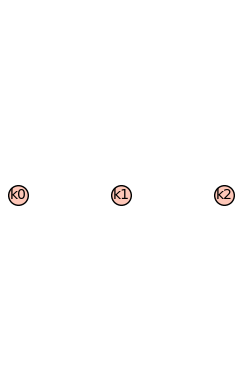

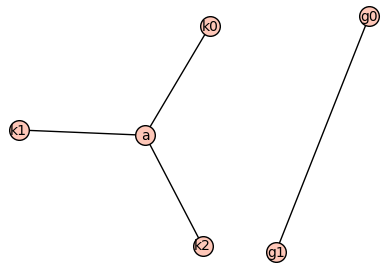

2
4


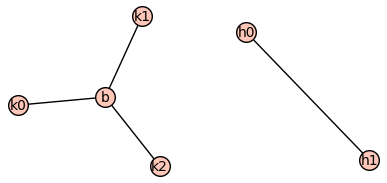

2
4
{'g1': 0, 'g0': 1} {'h0': 0, 'h1': 1}
[[(0,0,T), (0,1,T), ],[(1,0,T), (1,1,T), ],]


In [11]:
K1 = graphs.EmptyGraph()
for i in range(3):
    vertex_label = "k" + str(i)
    K1.add_vertex(vertex_label)
K1.show()

G1 = K1.copy()
G1.add_vertex("a")
G1.add_vertices(["g0", "g1"])
G1.add_edges([("a", x) for x in K1.vertices()])
G1.add_edge(("g0","g1"))
G1.show()
print(G1.clique_number())
print(G1.complement().clique_number())

H1 = K1.copy()
H1.add_vertex("b")
H1.add_vertices(["h0", "h1"])
H1.add_edges([("b", x) for x in K1.vertices()])
H1.add_edge(("h0","h1"))
H1.show()
print(H1.clique_number())
print(H1.complement().clique_number())

clauses1, M1, g1_map, h1_map = create_SAT_formula(G1, "a", H1, "b", K1)
print(g1_map, h1_map)
stack1 = setup_stack(clauses1)

solutions = recursive_solving(M1, clauses1, stack1)

for matrix in solutions:
    print(matrix)

## Step three: Return the gluing based on the solutions generated above. 

In [12]:
# Description: We will use a matrix M to glue two pointed graphs together. 
# Input: Two pointed graphs (G, a) and (H, b) as well as the intersection K. 
#        Also a d' x d' matrix M and g_map, h_map mappings from the matrix to the vertices of G and H. 
# Output: A graph, based on glueing along M. 
def glue(G, a, H, b, M, g_map, h_map): 
    # Copy G and H into a new graph
    glued_graph = G.copy()
    glued_graph.add_edges(H.edge_iterator())
    
    # Connect b to all vertices in G and a to all vertices in H
    for g_vertex in G.vertex_iterator():
        glued_graph.add_edge((b, g_vertex))
        
    for h_vertex in H.vertex_iterator():
        glued_graph.add_edge((a, h_vertex))
    
    # Add edges between vertices of G and H based on a succesfull gluing represented by M
    for x in g_map:
        for y in h_map:
            if M.matrix[g_map[x]][h_map[y]].exists == gc.EdgeExists.TRUE:
                glued_graph.add_edge((x, y))
    
    return glued_graph

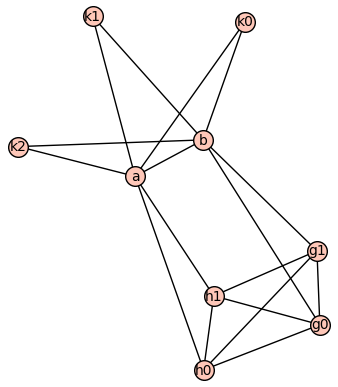

4
4


In [13]:
gluing = glue(G1, "a", H1, "b", M1, g1_map, h1_map)
gluing.show()

print(gluing.clique_number())
print(gluing.complement().clique_number())

In [14]:
## Step 